**MARKET CAMPAIGN ANALYSIS PROJECT**

In [1]:
import pandas as pd # type: ignore

C:\Users\Chika\AppData\Local\Temp\ipykernel_9100\408301630.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # type: ignore


In [2]:
#loading the dataset needed for our analysis
m_data = pd.read_excel("C:/Users/Chika/Downloads/marketing_campaign_dataset.xlsx")

In [3]:
#preview of the dataset
m_data.head(5)

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Date,Clicks,Impressions,Engagement_Score,Customer_Segment
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,16174,6.29,Chicago,2021-01-01 00:00:00,506,1922,6,Health & Wellness
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,11566,5.61,New York,2021-02-01 00:00:00,116,7523,7,Fashionistas
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,10200,7.18,Los Angeles,2021-03-01 00:00:00,584,7698,1,Outdoor Adventurers
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,12724,5.55,Miami,2021-04-01 00:00:00,217,1820,7,Health & Wellness
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,16452,6.50,Los Angeles,2021-05-01 00:00:00,379,4201,3,Health & Wellness


In [4]:
#Displaying deeper basic information about the dataset
m_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200005 entries, 0 to 200004
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200005 non-null  int64  
 1   Company           200005 non-null  object 
 2   Campaign_Type     200005 non-null  object 
 3   Target_Audience   200005 non-null  object 
 4   Duration          200005 non-null  object 
 5   Channel_Used      200005 non-null  object 
 6   Conversion_Rate   200005 non-null  float64
 7   Acquisition_Cost  200005 non-null  int64  
 8   ROI               200005 non-null  float64
 9   Location          200005 non-null  object 
 10  Date              200005 non-null  object 
 11  Clicks            200005 non-null  int64  
 12  Impressions       200005 non-null  int64  
 13  Engagement_Score  200005 non-null  int64  
 14  Customer_Segment  200005 non-null  object 
dtypes: float64(2), int64(5), object(8)
memory usage: 22.9+ MB


**DATA CEANING & EXPLORATION**

In [5]:
#Converting 'Duration' column to the right type -> numeric 
m_data['Duration'] = m_data['Duration'].str.replace(' days', '').astype(int)

In [6]:
#Converting 'Date' column to datetime format
m_data['Date'] = pd.to_datetime(m_data['Date'])

In [7]:
#Checking for missing values
missing_values = m_data.isnull().sum()

#Checking for duplicate rows
duplicate_rows = m_data.duplicated().sum()

#identifying outliers using the interquartile range (IQR) method for numerical columns
numeric_columns = ['Conversion_Rate', 'Acquisition_Cost', 'ROI', 'Clicks', 'Impressions', 'Engagement_Score']
outlier_summary = {}

for col in numeric_columns:
    Q1 = m_data[col].quantile(0.25)
    Q3 = m_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_count = ((m_data[col] < lower_bound) | (m_data[col] > upper_bound)).sum()
    outlier_summary[col] = outlier_count
    
    
#converting the outlier_summary dictionary to a DataFrame so it can be better read
outlier_df = pd.DataFrame(list(outlier_summary.items()), columns=['Column', 'Outlier Count'])

In [8]:
#Displaying results for missing values, duplicated rows and outlier summary
print("\nMissing Values:\n", missing_values)
print("\nDuplicate Rows:", duplicate_rows)
print("\nOutlier Summary:\n")
display(outlier_df)


Missing Values:
 Campaign_ID         0
Company             0
Campaign_Type       0
Target_Audience     0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Date                0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
dtype: int64

Duplicate Rows: 0

Outlier Summary:



,Column,Outlier Count
0,Conversion_Rate,0
1,Acquisition_Cost,0
2,ROI,0
3,Clicks,0
4,Impressions,0
5,Engagement_Score,0


In [9]:
#Unique target audience and marketing channels
unique_audiences = m_data["Target_Audience"].unique()
unique_channels = m_data["Channel_Used"].unique()

#print unique target audience and marketig channels
print("Unique Target Audiences:\n", m_data["Target_Audience"].unique())
print("\nUnique Marketing Channels:\n", m_data["Channel_Used"].unique())

Unique Target Audiences:
 ['Men 18-24' 'Women 35-44' 'Men 25-34' 'All Ages' 'Women 25-34']

Unique Marketing Channels:
 ['Google Ads' 'YouTube' 'Instagram' 'Website' 'Facebook' 'Email']


**INSIGHT GENERATION**

In [10]:
#Displaying summary statistics for key numerical columns
summary_statistics = m_data[numeric_columns].describe()

print(summary_statistics)

       Conversion_Rate  Acquisition_Cost            ROI         Clicks  \
count    200005.000000     200005.000000  200005.000000  200005.000000   
mean          0.080069      12504.441794       5.002416     549.774591   
std           0.040602       4337.663210       1.734485     260.019354   
min           0.010000       5000.000000       2.000000     100.000000   
25%           0.050000       8740.000000       3.500000     325.000000   
50%           0.080000      12497.000000       5.010000     550.000000   
75%           0.120000      16264.000000       6.510000     775.000000   
max           0.150000      20000.000000       8.000000    1000.000000   

         Impressions  Engagement_Score  
count  200005.000000     200005.000000  
mean     5507.307107          5.494673  
std      2596.863794          2.872593  
min      1000.000000          1.000000  
25%      3266.000000          3.000000  
50%      5518.000000          5.000000  
75%      7753.000000          8.000000  
max  

In [11]:
#Performance Analysis across channels

campaign_performance = m_data.groupby("Campaign_Type").agg({
    "ROI": "mean",
    "Conversion_Rate": "mean",
    "Clicks": "mean",
    "Impressions": "mean",
    "Engagement_Score": "mean"
}).sort_values(by="ROI", ascending=False)

print(campaign_performance)

                    ROI  Conversion_Rate      Clicks  Impressions  \
Campaign_Type                                                       
Influencer     5.011040         0.080315  548.622977  5495.938362   
Search         5.008357         0.080021  548.650148  5513.737057   
Display        5.006497         0.080088  550.961213  5503.669701   
Email          4.994274         0.079787  549.224499  5521.506734   
Social Media   4.991781         0.080132  551.429493  5501.726211   

               Engagement_Score  
Campaign_Type                    
Influencer             5.483022  
Search                 5.487138  
Display                5.505777  
Email                  5.499661  
Social Media           5.497878  


In [12]:
#Determining Campaign effectiveness

#Calculating the Click-Through Rate in percentage (CTR) and Cost Per Click (CPC)
m_data["CTR"] = (m_data["Clicks"] / m_data["Impressions"]) * 100
m_data["CPC"] = m_data["Acquisition_Cost"] / m_data["Clicks"] 

#Compute mean of CTR and CPC by campaign type

campaign_ctr_cpc = m_data.groupby("Campaign_Type").agg({
    "CTR": "mean",
    "CPC": "mean"
}).sort_values(by="CTR", ascending=False)

print(campaign_ctr_cpc)

                     CTR        CPC
Campaign_Type                      
Display        14.126483  31.923411
Social Media   14.103856  32.014830
Influencer     14.030083  32.102645
Search         13.993587  31.960865
Email          13.948757  32.039734


In [13]:
#Identifying top 5 high performing and underperforming campaigns based on ROI

top_campaigns =m_data.nlargest(5, "ROI")[["Company", "Campaign_Type", "ROI", "CTR", "CPC", "Conversion_Rate"]]
bottom_campaigns = m_data.nsmallest(5, "ROI")[["Company", "Campaign_Type", "ROI", "CTR", "CPC", "Conversion_Rate"]]

#Printing result
print(top_campaigns)
print (bottom_campaigns)

                  Company Campaign_Type  ROI        CTR        CPC  \
167        NexGen Systems       Display  8.0  11.366820  20.913732   
219   Innovate Industries    Influencer  8.0  25.781250  11.402597   
3055       NexGen Systems        Search  8.0   9.129256  24.966997   
3231    Alpha Innovations       Display  8.0  13.123794  26.804622   
5347             TechCorp  Social Media  8.0   5.121327  33.104762   

      Conversion_Rate  
167              0.12  
219              0.03  
3055             0.11  
3231             0.01  
5347             0.06  
                 Company Campaign_Type  ROI        CTR        CPC  \
1163      NexGen Systems       Display  2.0  12.513331  26.085227   
1380   Alpha Innovations       Display  2.0  11.364356  15.640669   
7599            TechCorp       Display  2.0  22.053676  18.193651   
7823            TechCorp  Social Media  2.0   4.535413  49.782235   
10285  Alpha Innovations         Email  2.0   8.314491  22.977750   

       Conversion_Ra

In [14]:
#Exploring location-based trends 
location_performance = m_data.groupby("Location").agg({
    "ROI": "mean",
    "Conversion_Rate": "mean",
    "Clicks": "mean",
    "Impressions": "mean",
    "Engagement_Score": "mean"
}).sort_values(by="ROI", ascending=False)

print(location_performance)

                  ROI  Conversion_Rate      Clicks  Impressions  \
Location                                                          
Miami        5.012282         0.080047  547.735603  5496.727657   
Los Angeles  5.010876         0.080013  549.892432  5498.593762   
Houston      5.007174         0.079949  550.755327  5512.560665   
Chicago      5.001555         0.080131  549.331667  5498.196886   
New York     4.980185         0.080203  551.177164  5530.537314   

             Engagement_Score  
Location                       
Miami                5.495766  
Los Angeles          5.488823  
Houston              5.514578  
Chicago              5.505061  
New York             5.469257  


**VISUALIZATION**

In [15]:
import matplotlib.pyplot as plt

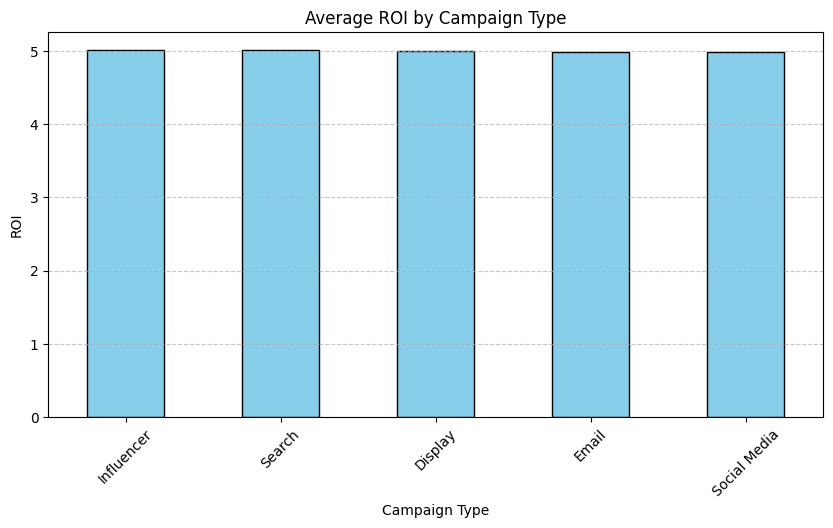

In [16]:
#Bar chart: To show average ROI by campaign Type

plt.figure(figsize=(10, 5))
campaign_performance["ROI"].plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average ROI by Campaign Type")
plt.xlabel("Campaign Type")
plt.ylabel("ROI")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

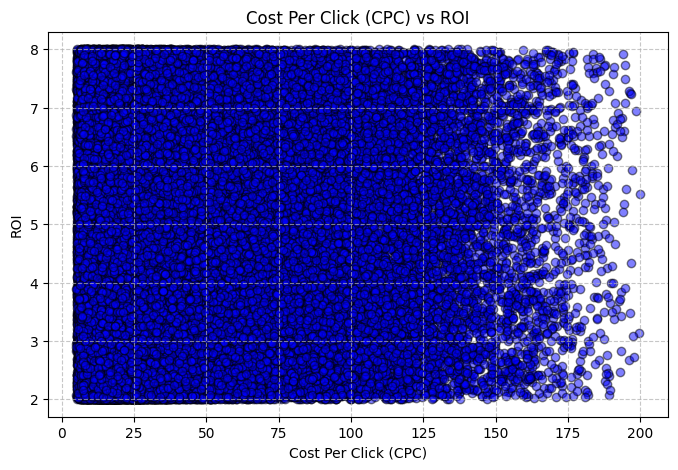

In [17]:
# Using scatter plot to analyze the relationship between CPC and ROI to see if higher spending results to better returns

# CPC vs ROI
plt.figure(figsize=(8,5))
plt.scatter(m_data["CPC"], m_data["ROI"], alpha=0.5, color="blue", edgecolors="black")
plt.title("Cost Per Click (CPC) vs ROI")
plt.xlabel("Cost Per Click (CPC)")
plt.ylabel("ROI")
plt.grid(True, linestyle="--", alpha=0.7)

#show plot
plt.show()

Text(0.5, 1.0, 'Correlation Between Key Campaign Metrics')

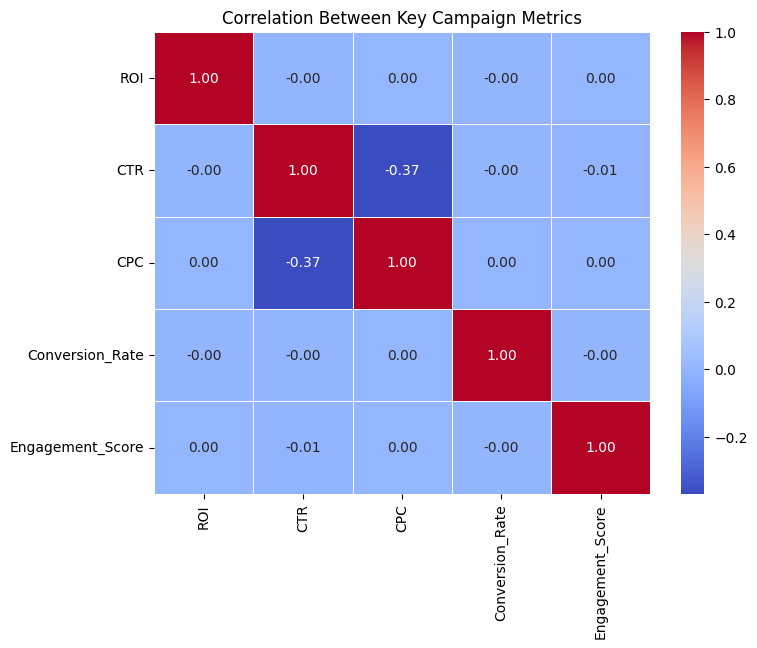

In [18]:
#computing a correlation matrix to help with visuals to showcorrelation between key metrics (ROI, CTR,CPC, Conversion Rate and Engagement Score)

import seaborn as sns
import numpy as np

correlation_matrix = m_data[["ROI", "CTR", "CPC", "Conversion_Rate", "Engagement_Score"]].corr()

#Heatmap: Correlation between key metrics
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths =0.5)
plt.title("Correlation Between Key Campaign Metrics")

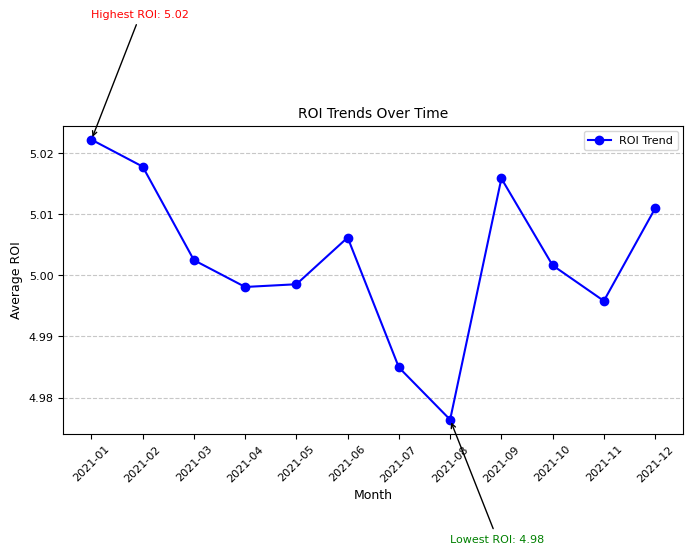

In [19]:
#Line chart to show ROI trends over time

# Group data by month and calculate the average ROI
m_data["Month"] = m_data["Date"].dt.to_period("M")  # Convert to year-month format
roi_trends = m_data.groupby("Month")["ROI"].mean()

# Set proper figure size and Plot the line chart
plt.figure(figsize=(8, 4))
plt. plot(roi_trends.index.astype(str),roi_trends, marker="o", linestyle="-", color="blue", label="ROI Trend")

# Find the highest and lowest ROI points
max_roi = roi_trends.max()
min_roi = roi_trends.min()
max_month = roi_trends.idxmax().strftime("%Y-%m")  # Convert period to string
min_month = roi_trends.idxmin().strftime("%Y-%m")  # Convert period to string

# Annotate the highest ROI with better positioning
plt.annotate(f"Highest ROI: {max_roi:.2f}", 
             xy=(max_month, max_roi), 
             xytext=(max_month, max_roi + 0.02),  # Small text offset
             arrowprops=dict(facecolor="red", arrowstyle="->", lw =1), 
             fontsize=8, color="red")

# Annotate the lowest ROI with better positioning
plt.annotate(f"Lowest ROI: {min_roi:.2f}", 
             xy=(min_month, min_roi), 
             xytext=(min_month, min_roi - 0.02),  # Small text offset
             arrowprops=dict(facecolor="green", arrowstyle="->", lw=1), 
             fontsize=8, color="green")

plt.title("ROI Trends Over Time", fontsize=10)
plt.xlabel("Month", fontsize=9)
plt.ylabel("Average ROI", fontsize=9)
plt.xticks(rotation=45, fontsize=8)  # Smaller font for readability
plt.yticks(fontsize=8)
plt.legend(fontsize=8)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()